# Implementando algoritmos de Machine Learning com Scikit-learn

# 1. Carregamento e Visualização Inicial

   ## Carregar os dados e explorar sua estrutura:

    Área  Perímetro  Compacidade  Comprimento_Núcleo  Largura_Núcleo  \
0  15.26      14.84       0.8710               5.763           3.312   
1  14.88      14.57       0.8811               5.554           3.333   
2  14.29      14.09       0.9050               5.291           3.337   
3  13.84      13.94       0.8955               5.324           3.379   
4  16.14      14.99       0.9034               5.658           3.562   

   Coeficiente_Assimetria  Comprimento_Sulco  Variedade  
0                   2.221              5.220          1  
1                   1.018              4.956          1  
2                   2.699              4.825          1  
3                   2.259              4.805          1  
4                   1.355              5.175          1  
             Área   Perímetro  Compacidade  Comprimento_Núcleo  \
count  210.000000  210.000000   210.000000          210.000000   
mean    14.847524   14.559286     0.870999            5.628533   
std      2.909699    

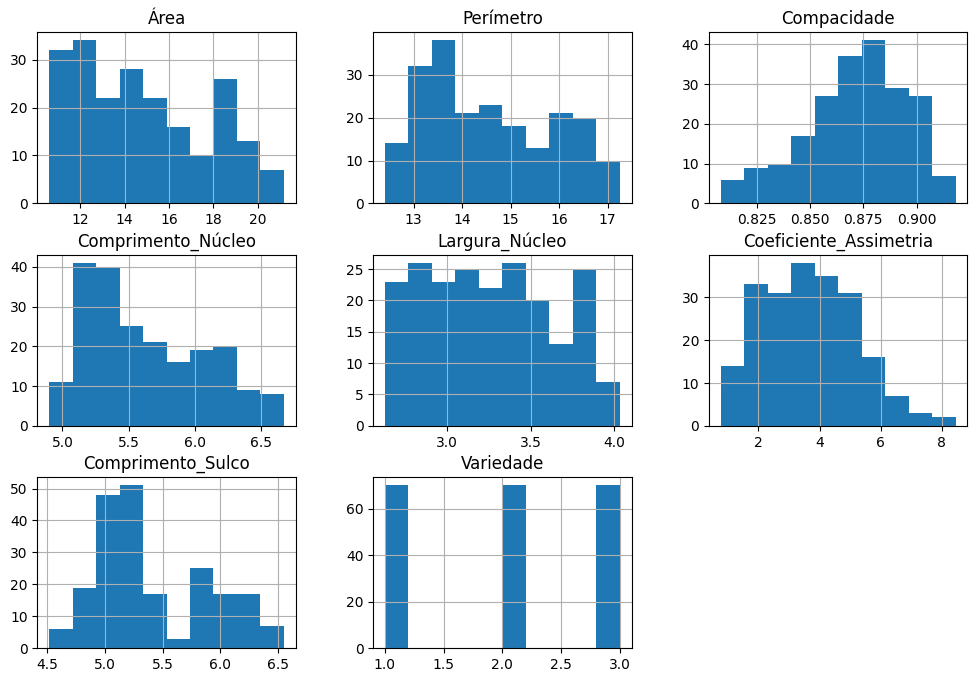

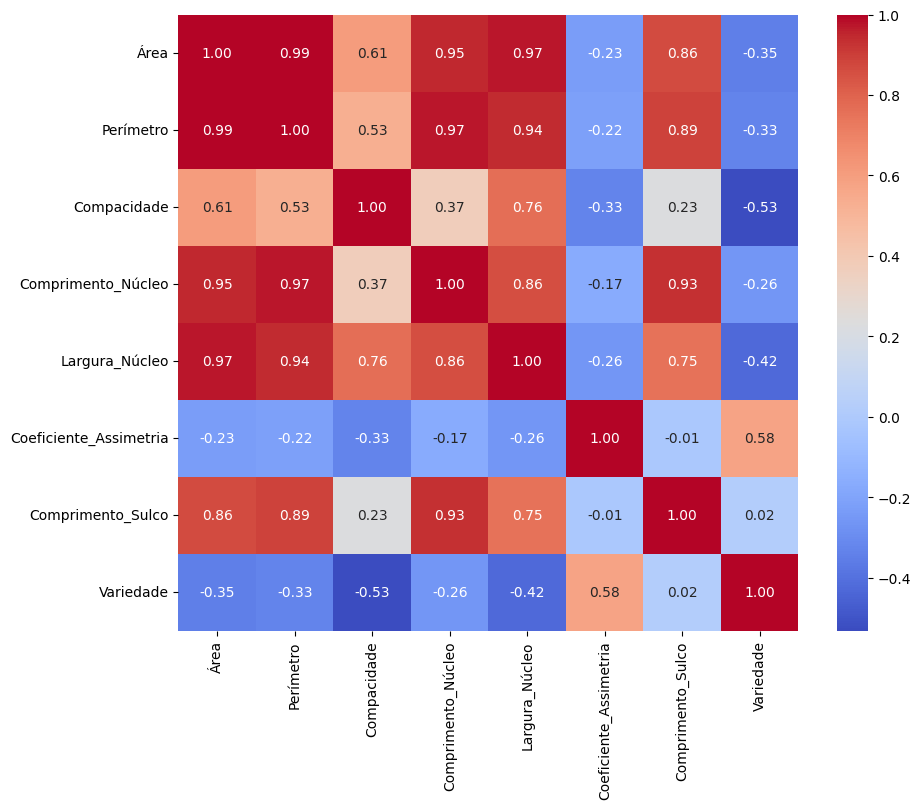

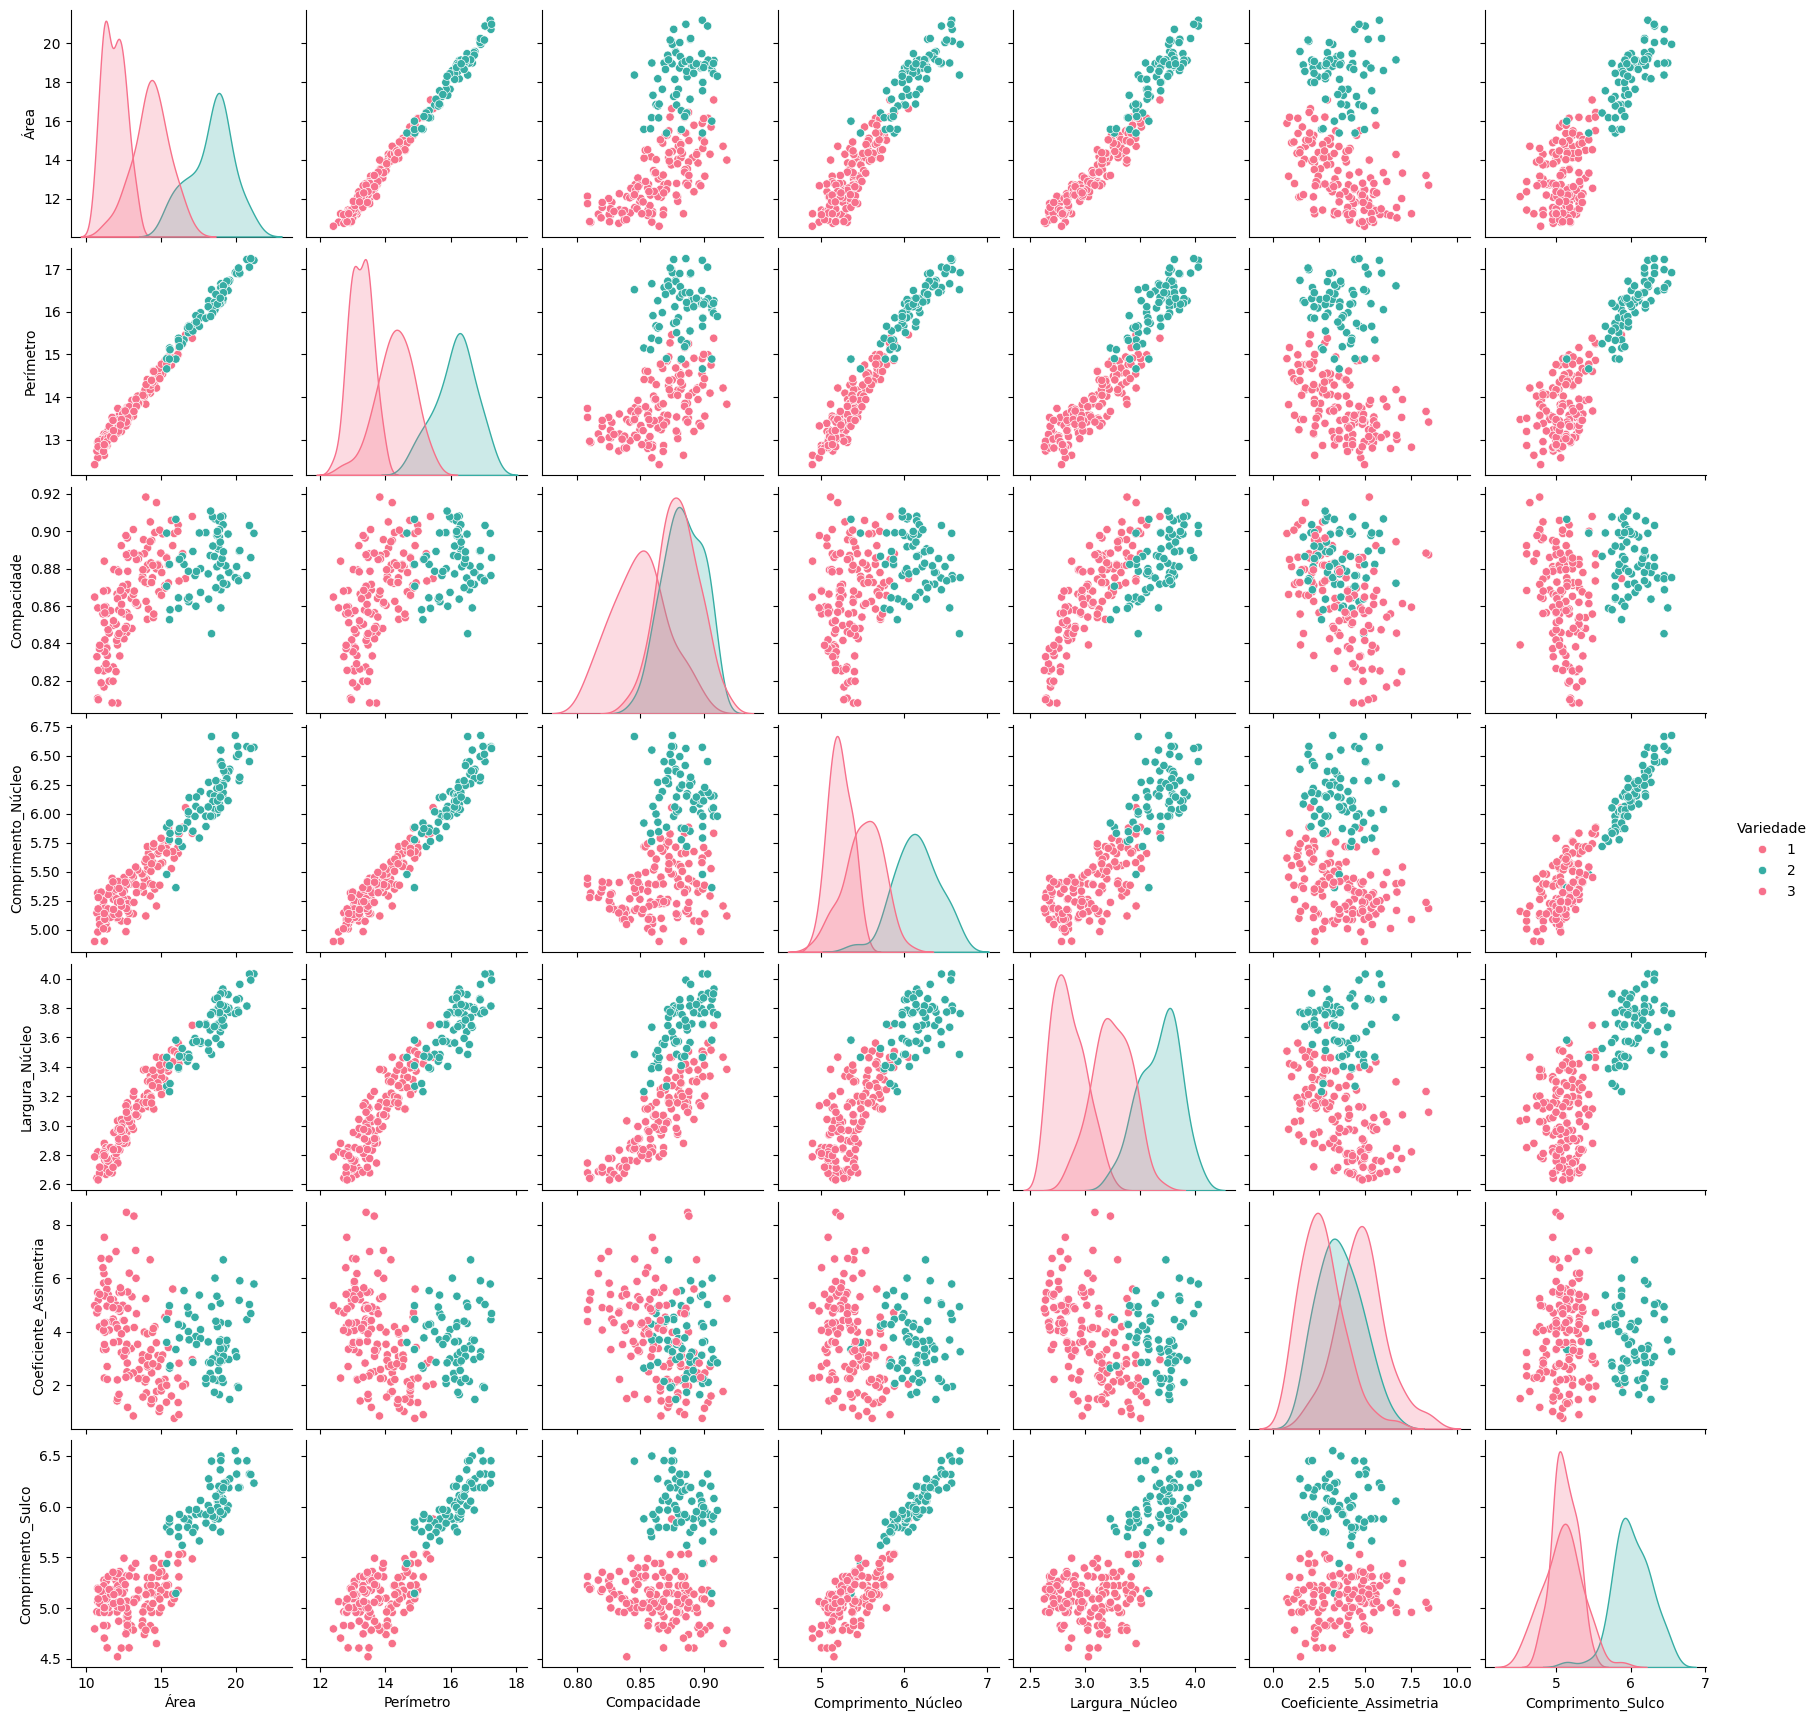

In [46]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Definir nomes das colunas
columns = ['Área', 'Perímetro', 'Compacidade', 'Comprimento_Núcleo', 'Largura_Núcleo',
           'Coeficiente_Assimetria', 'Comprimento_Sulco', 'Variedade']

# Ler o arquivo tratando múltiplos espaços como delimitadores
df = pd.read_csv("seeds_dataset.txt", sep="\s+", names=columns)

# Exibir as primeiras linhas
print(df.head())

# Estatísticas descritivas
print(df.describe())

# Verificar valores ausentes
print(df.isnull().sum())

# Visualizar distribuições dos atributos
df.hist(figsize=(12, 8))
plt.show()

# Correlação entre Variáveis
# Calcular correlações
corr_matrix = df.corr()

# Exibir heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

# Separabilidade das Classes
sns.pairplot(df, hue="Variedade", palette="husl")
plt.show()





# 2. Normalização e Padronização dos Dados

##Utilizar MinMaxScaler ou StandardScaler para que as escalas dos atributos não influenciem o modelo.

##Aplicar StandardScaler para padronizar os dados, pois os dados possuem magnitudes muito diferentes e deve padronizá-los antes da modelagem.

##Aplicar Teste de Shapiro-Wilk para avaliar se uma variável segue uma distribuição normal.


In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats import shapiro

# Definir X (variáveis preditoras) e y (variável alvo)
X = df.iloc[:, :-1]  # Todas as colunas, exceto 'Variedade'
y = df.iloc[:, -1]   # Apenas a coluna 'Variedade'

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
df_minmax = df.copy()
df_minmax.iloc[:, :-1] = scaler_minmax.fit_transform(df.iloc[:, :-1])

# StandardScaler (Z-score)
scaler_standard = StandardScaler()
df_standard = df.copy()
df_standard.iloc[:, :-1] = scaler_standard.fit_transform(df.iloc[:, :-1])


# Executar o teste de normalidade Shapiro-Wilk
for coluna in df.columns[:-1]:  # Ignorando a coluna 'Variedade'
    stat, p = shapiro(df[coluna])
    print(f"{coluna}: Estatística={stat:.3f}, p-valor={p:.3f}")



Área: Estatística=0.933, p-valor=0.000
Perímetro: Estatística=0.936, p-valor=0.000
Compacidade: Estatística=0.973, p-valor=0.000
Comprimento_Núcleo: Estatística=0.944, p-valor=0.000
Largura_Núcleo: Estatística=0.961, p-valor=0.000
Coeficiente_Assimetria: Estatística=0.984, p-valor=0.015
Comprimento_Sulco: Estatística=0.925, p-valor=0.000


# 3. Separação em Conjuntos de Treinamento e Teste

## Dividir os dados para treinar e testar os modelos:


In [48]:
from sklearn.model_selection import train_test_split

# Definir X (variáveis preditoras) e y (variável alvo)
X = df.iloc[:, :-1]
y = df['Variedade']

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# 4. Implementação e Comparação dos Algoritmos de Classificação

## Treinar diferentes modelos de classificação e avaliar seu desempenho:


In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Modelos de classificação
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear'),
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Naive Bayes": GaussianNB(),
}

# Treinar e avaliar cada modelo
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\nModelo: {name}")
    print(classification_report(y_test, y_pred))
    print("Matriz de Confusão:")
    print(confusion_matrix(y_test, y_pred))

# Comparação de acurácia
print("\nComparação de Acurácia:")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")



Modelo: Random Forest
              precision    recall  f1-score   support

           1       0.94      0.81      0.87        21
           2       0.95      0.95      0.95        21
           3       0.88      1.00      0.93        21

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63

Matriz de Confusão:
[[17  1  3]
 [ 1 20  0]
 [ 0  0 21]]

Modelo: KNN
              precision    recall  f1-score   support

           1       0.84      0.76      0.80        21
           2       0.86      0.90      0.88        21
           3       0.91      0.95      0.93        21

    accuracy                           0.87        63
   macro avg       0.87      0.87      0.87        63
weighted avg       0.87      0.87      0.87        63

Matriz de Confusão:
[[16  3  2]
 [ 2 19  0]
 [ 1  0 20]]

Modelo: SVM
              precision    recall  f1-score   support

           1       0

#5. Otimização dos Modelos
##Utilizar Grid Search para encontrar melhores hiperparâmetros:

In [50]:

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Otimização do SVM
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

# Melhor combinação de parâmetros SVM
print("Melhores parâmetros para SVM:", grid.best_params_)

# Otimização do K-Nearest Neighbors (KNN)
# Testar diferentes valores para n_neighbors e o tipo de métrica utilizada:
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)

# Melhor combinação de parâmetros KNN
print("Melhores parâmetros para KNN:", grid_knn.best_params_)


# Otimização do Random Forest
# Explorar o número de árvores na floresta (n_estimators),
# profundidade (max_depth) e critérios de divisão (criterion):
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20], 'criterion': ['gini', 'entropy']}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)

# Melhor combinação de parâmetros Randon Forest
print("Melhores parâmetros para Random Forest:", grid_rf.best_params_)


# Otimização do Naive Bayes
# O algoritmo GaussianNB não tem muitos hiperparâmetros para ajustar, mas
# podemos otimizar var_smoothing para melhor regularização:
param_grid_nb = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
grid_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=5)
grid_nb.fit(X_train, y_train)

# Melhor combinação de parâmetros Naive Bayes
print("Melhores parâmetros para Naive Bayes:", grid_nb.best_params_)


# Otimização da Regressão Logística

# Padronização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Ajustar o solver (solver) e o parâmetro de regularização (C):
param_grid_lr = {'C': [0.01, 0.1, 1, 10], 'solver': ['newton-cg']}
grid_lr = GridSearchCV(LogisticRegression(max_iter=2000), param_grid_lr, cv=5)
grid_lr.fit(X_train, y_train)

# Melhor combinação de parâmetros Regressão Logística
print("Melhores parâmetros para Regressão Logística:", grid_lr.best_params_)





Melhores parâmetros para SVM: {'C': 10, 'kernel': 'linear'}
Melhores parâmetros para KNN: {'n_neighbors': 9, 'weights': 'uniform'}
Melhores parâmetros para Random Forest: {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 50}
Melhores parâmetros para Naive Bayes: {'var_smoothing': 1e-09}
Melhores parâmetros para Regressão Logística: {'C': 10, 'solver': 'newton-cg'}


#6 - Seleção de Atributos e Ajustes de hiperparâmetros no Random Forest

##Seleção de atributos para melhorar a eficiência do modelo e testar ajustes de hiperparâmetros para aumentar a performance no Random Forest.


In [51]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

# Aplicar seleção de atributos ao modelo Random Forest
selector = SelectFromModel(RandomForestClassifier(n_estimators=50, random_state=42))
selector.fit(X_train, y_train)

# Filtrar apenas os atributos selecionados
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

print(f"Número de atributos selecionados Randon Forest: {X_train_selected.shape[1]}")


# Definição dos hiperparâmetros para teste no Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'criterion': ['gini', 'entropy']
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train_selected, y_train)

print(f"Melhores parâmetros encontrados Randon Forest: {grid_rf.best_params_}")


Número de atributos selecionados Randon Forest: 4
Melhores parâmetros encontrados Randon Forest: {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 50}


# 7 - Importância das variáveis no Random Forest
## Gráfico de barras mostrando quais variáveis tiveram maior impacto na previsão do modelo.

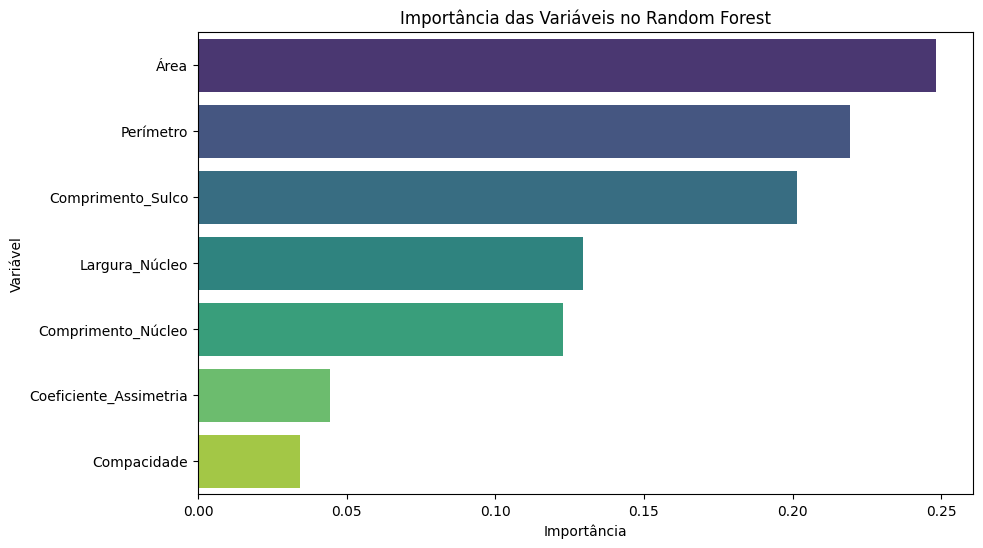

In [52]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Treinar modelo Random Forest
rf_model = RandomForestClassifier(criterion='entropy', max_depth=None, n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

# Obter importância das variáveis
importances = rf_model.feature_importances_
features = X_train.columns  # Certifique-se de que X_train seja um DataFrame com nomes de colunas

# Ordenar importância
indices = np.argsort(importances)[::-1]

# Criar gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=[features[i] for i in indices], hue=[features[i] for i in indices], palette="viridis", legend=False)
plt.xlabel("Importância")
plt.ylabel("Variável")
plt.title("Importância das Variáveis no Random Forest")
plt.show()


#8 - Avaliação de cada modelo com diferentes métricas

In [53]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, log_loss

# Avaliação de cada modelo com diferentes métricas
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None  # Alguns modelos não têm predict_proba

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    auc = roc_auc_score(y_test, y_prob, multi_class='ovr') if y_prob is not None else None
    auc = roc_auc_score(y_test, y_prob, multi_class='ovo') if y_prob is not None else None

    logloss = log_loss(y_test, y_prob) if y_prob is not None else None

    results[name] = {"Acurácia": acc, "Precisão": precision, "Revocação": recall, "F1-score": f1, "AUC-ROC": auc, "Log Loss": logloss}

    print(f"\nModelo: {name}")
    print(f"Acurácia: {acc:.4f}")
    print(f"Precisão: {precision:.4f}")
    print(f"Revocação: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    if auc is not None:
        print(f"AUC-ROC: {auc:.4f}")
    if logloss is not None:
        print(f"Log Loss: {logloss:.4f}")

# Comparação das métricas em formato de tabela
import pandas as pd
df_results = pd.DataFrame(results).T
print("\nResultados Comparativos:")
print(df_results)


Modelo: Random Forest
Acurácia: 0.9206
Precisão: 0.9239
Revocação: 0.9206
F1-score: 0.9192
AUC-ROC: 0.9830
Log Loss: 0.2246

Modelo: KNN
Acurácia: 0.8730
Precisão: 0.8716
Revocação: 0.8730
F1-score: 0.8713
AUC-ROC: 0.9497
Log Loss: 1.8758

Modelo: SVM
Acurácia: 0.8571
Precisão: 0.8565
Revocação: 0.8571
F1-score: 0.8559

Modelo: Logistic Regression
Acurácia: 0.8571
Precisão: 0.8555
Revocação: 0.8571
F1-score: 0.8540
AUC-ROC: 0.9766
Log Loss: 0.2928

Modelo: Naive Bayes
Acurácia: 0.8254
Precisão: 0.8339
Revocação: 0.8254
F1-score: 0.8251
AUC-ROC: 0.9701
Log Loss: 0.8231

Resultados Comparativos:
                     Acurácia  Precisão  Revocação  F1-score   AUC-ROC  \
Random Forest        0.920635  0.923942   0.920635  0.919170  0.982993   
KNN                  0.873016  0.871611   0.873016  0.871318  0.949735   
SVM                  0.857143  0.856522   0.857143  0.855876       NaN   
Logistic Regression  0.857143  0.855512   0.857143  0.854014  0.976568   
Naive Bayes          0.82539